# Using TCLab

## Creating a TCLab instance
    
Once installed, the `tclab` package can be imported into Python and an instance created with the Python statements

    from tclab import TCLab
    lab = TCLab()
    # do something
    lab.close()

TCLab() attempts to find a device connected to a serial port and return a connection. An error is generated if no device is found.  The connection must be closed when no longer in use.

In [1]:
from tclab import TCLab

lab = TCLab()
# do something
lab.close()

TCLab version 0.4.10dev
Arduino Leonardo connected on port /dev/cu.usbmodem144101 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
TCLab disconnected successfully.


## Using the LED

The following cell demonstrates the  process, and uses the tclab `LED()` function to flash the LED on the Temperature Control Lab for a period of 10 seconds at a 100% brightness level. 

In [2]:
from tclab import TCLab

lab = TCLab()
lab.LED(50)
lab.close()

TCLab version 0.4.10dev
Arduino Leonardo connected on port /dev/cu.usbmodem144101 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
TCLab disconnected successfully.


## Using TCLab and Python's `with` statement

The Python `with` statement provides a convenient means of setting up and closing a connection to the Temperature Control Laboratory. In particular, the with statement establishes a context where a tclab instance is created, assigned to a variable, and automatically closed upon completion. The `with` statement is the preferred way to connect the Temperature Control Laboratory for most uses.

In [3]:
from tclab import TCLab

with TCLab() as lab:
    lab.LED(100)

TCLab version 0.4.10dev
Arduino Leonardo connected on port /dev/cu.usbmodem144101 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
TCLab disconnected successfully.


## Reading Temperatures

Once a tclab instance is created and connected to a device the temperature sensors are acccessed with the attributes `.T1` and `.T2`.  Given an instance named `lab`, the temperatures are accessed as

    T1 = lab.T1
    T2 = lab.T2

Note that `lab.T1` and `lab.T2` are read-only properties. Attempt to assign a value will return a Python error.

In [4]:
from tclab import TCLab

with TCLab() as lab:
    T1 = lab.T1
    T2 = lab.T2
    print(f"Temperature 1: {T1:0.2f} C")
    print(f"Temperature 2: {T2:0.2f} C")

TCLab version 0.4.10dev
Arduino Leonardo connected on port /dev/cu.usbmodem144101 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
Temperature 1: 21.22 C
Temperature 2: 20.45 C
TCLab disconnected successfully.


## Setting Heater Power

### Setting maximum power with `.P1` and `.P2`

Heater power is specified as a percentage of the maximum power available at each heater. The maximum power to each heater is determined by setting parameters `.P1` and `.P2` to number in the range 0 and 255. The default settings are

    lab.P1 = 200
    lab.P2 = 100
    
Based on laboratory measurements, the power delivered to each heater is approximately 14.5 mW per unit increase in `.P1` and `.P2`. For heater 1 at the default setting of 200, the power is 

$$ 200 \times 14.5 \text{mW} \times \frac{\text{1 watt}}{\text{1000 mW}} = 2.9\text{ watts}$$

For heater 2 at the default setting of 100, the power is

$$ 100 \times 14.5 \text{mW} \times \frac{\text{1 watt}}{\text{1000 mW}} = 1.45\text{ watts}$$

Note that the power delivered to the heaters for constant `.P1` and `.P2` is temperature dependent, and there will be some variation among units.

The default values for `.P1` and `.P2` were chosen to avoid unnecessarily high temperatures, and to include an asymmetric response between the two heaters.

In [ ]:
from tclab import TCLab

with TCLab() as lab:
    P1 = lab.P1
    P2 = lab.P2
    print(f"The maximum power of heater 1 is set to {P1:.0f} corresponding to {P1*0.0145:.2f} watts.")
    print(f"The maximum power of heater 1 is set to {P2:.0f} corresponding to {P2*0.0145:.2f} watts.")

### Setting heater power with `.Q1()` and `.Q2()`

For legacy reasons, there are two ways to set the percentage of maximum power delivered to the heaters. The first way is to the functions`.Q1()` and `.Q2()` of a `TCLab` instance. For example, both heaters can be set to 100% power with the functions

    lab = TCLab()
    lab.Q1(100)
    lab.Q2(100)

The device firmware limits the heaters to a range of 0 to 100%. The current settiing may be accessed via

    Q1 = lab.Q1()
    Q2 = lab.Q2()
    
The LED on the temperature control laboratory will turns bright when either heater is on. Closing the TCLab instance turns the heaters off.

In [ ]:
from tclab import TCLab
import time

with TCLab() as lab:
    print(f"Starting Temperature 1: {lab.T1:0.2f} C")
    print(f"Starting Temperature 2: {lab.T2:0.2f} C")

    lab.Q1(100)
    lab.Q2(100)
    
    print(f"Set Heater 1: {lab.Q1()} %")
    print(f"Set Heater 2: {lab.Q2()} %")
    
    t_heat = 30
    print(f"Heat for {t_heat} seconds")
    time.sleep(t_heat)

    print("Turn Heaters Off")
    lab.Q1(0)
    lab.Q2(0)

    print("Set Heater 1:", lab.Q1(), "%")
    print("Set Heater 2:", lab.Q2(), "%")
    
    print(f"Final Temperature 1: {lab.T1:0.2f} C")
    print(f"Final Temperature 2: {lab.T2:0.2f} C")

### Setting heater power with `.U1` and `.U2`

Alternatively, the percentage of maximum power delivered to the heaters can be set by assigning value to the `.U1` and `.U2` attributes of a `TCLab` instances. Getting the value of `.U1` and `.U2` retrieves the current settings.

In [ ]:
lab = TCLab()

print('Setting power levels on heaters 1 and 2')
lab.U1 = 50
lab.U2 = 25

print('Current power level on Heater 1 is: ', lab.U1, '%')
print('Current power level on Heater 1 is: ', lab.U2, '%')

lab.close()

## Synchronizing with Real Time using `clock`

The `tclab` module includes `clock` for synchronizing calculations with real time.  `clock(t_period, t_step)` generates a sequence of evenly spaced time step over a period`t_period` seconds that are `t_step` seconds apart. If `t_step` is omitted then the default time step is set to 1 second.

In [ ]:
from tclab import clock

t_period = 6
t_step = 2
for t in clock(t_period, t_step):
    print(t, "sec.")

There are some considerations to keep in mind when using `clock`. Most important, by its nature Python is not a real-time environment. `clock` makes a best effort to stay in sync with evenly spaced ticks of the real time clock. If, for some reason, the loop falls behind the real time clock, then the generator will skip over the event to get back in sync with the real time clock. Thus the total number of iterations may be less than expected. This behavior is demonstrated in the following cell.

In [10]:
from tclab import TCLab, clock

import time

t_period = 12
t_step = 2
for t in clock(t_period, t_step):
    print(t, "sec.")
    
    # insert a long time out between 3 and 5 seconds into the event loop
    if (t > 3) and (t < 5):
        time.sleep(2.2)

0 sec.
2.0 sec.
4.0 sec.
8.0 sec.
10.0 sec.
12.0 sec.


### Using `clock` with TCLab

The following cell demonstrates use of `clock` to perform a short experiment. 

In [11]:
from tclab import TCLab, clock

# length of the experiment in seconds
t_period = 20

with TCLab() as lab:
    # turn heaters on to 100%
    lab.Q1(100)
    lab.Q2(100)
    print(f"Set Heater 1 to {lab.Q1():.1f} %")
    print(f"Set Heater 2 to {lab.Q2():.1f} %")

    # print temperatures each second for tperiod seconds
    for t in clock(t_period):
        print(f"{t:5.1f} sec:  T1 = {lab.T1:4.1f} C   T2 = {lab.T2:4.1f} C")   

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem14401 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
Set Heater 1 to 100.0 %
Set Heater 2 to 100.0 %
  0.0 sec:  T1 = 34.8 C   T2 = 31.0 C
  1.0 sec:  T1 = 34.8 C   T2 = 31.6 C
  2.0 sec:  T1 = 34.8 C   T2 = 31.6 C
  3.0 sec:  T1 = 34.9 C   T2 = 31.2 C
  4.0 sec:  T1 = 35.0 C   T2 = 31.4 C
  5.0 sec:  T1 = 35.1 C   T2 = 31.6 C
  6.0 sec:  T1 = 35.1 C   T2 = 32.0 C
  7.0 sec:  T1 = 35.2 C   T2 = 32.0 C
  8.0 sec:  T1 = 35.3 C   T2 = 31.6 C
  9.0 sec:  T1 = 35.4 C   T2 = 31.8 C
 10.0 sec:  T1 = 35.4 C   T2 = 32.0 C
 11.0 sec:  T1 = 35.7 C   T2 = 32.4 C
 12.0 sec:  T1 = 35.7 C   T2 = 32.4 C
 13.0 sec:  T1 = 35.9 C   T2 = 32.4 C
 14.0 sec:  T1 = 36.0 C   T2 = 32.5 C
 15.0 sec:  T1 = 36.1 C   T2 = 32.3 C
 16.0 sec:  T1 = 36.4 C   T2 = 32.3 C
 17.0 sec:  T1 = 36.4 C   T2 = 32.8 C
 18.0 sec:  T1 = 36.7 C   T2 = 33.0 C
 19.0 sec:  T1 = 36.9 C   T2 = 33.0 C
 20.0 sec:  T1 = 37.0 C   T2 = 32.8 C
TCLab disconnect

## The TCLab `Historian`

The `Historian` class provides means for logging process data to a database. 

Given a list `sources` of data sources and methods to access the data, `Historian(sources)` creates an historian that logs data to database on each call to `.update()`. Given an instance `lab` of a TCLab object, `lab.sources` is a default list of data sources and methods for logging temperatures `lab.T1` and `lab.T2` and power settings `lab.U1` and `lab.U2`.

    lab = TCLab()
    h = Historian(lab.sources)
    
The historian automatically initializes a database to log the process data. The database is updated by issuing a command

    h.update(t)
    
where `t` is variable containing the current time. 

To demonstrate, the following cell logs 10 seconds of data with time varying power level applied to heater 1. When the experiment is over, `h.to_csv` saves the data to a file that be imported in python or a spreadsheet application.

In [12]:
from tclab import TCLab, clock, Historian

with TCLab() as lab:
    h = Historian(lab.sources)
    for t in clock(10):
        lab.Q1(100 if t <= 5 else 0)
        h.update(t)
        
h.to_csv('data.csv')

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem14401 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
TCLab disconnected successfully.


Once saved, data can be read and plotted using the [Pandas Data Analysis Library](https://pandas.pydata.org/) as demonstrated in this cell.

        Time      T1      T2     Q1   Q2
Time                                    
0.00    0.00  37.979  33.306  100.0  0.0
1.00    1.00  38.301  33.467  100.0  0.0
2.01    2.01  38.397  33.467  100.0  0.0
3.01    3.01  38.623  33.757  100.0  0.0
4.00    4.00  38.784  33.789  100.0  0.0
5.00    5.00  38.945  33.821  100.0  0.0
6.00    6.00  39.268  34.111    0.0  0.0
7.00    7.00  39.268  34.111    0.0  0.0
8.00    8.00  39.461  34.111    0.0  0.0
9.00    9.00  39.590  34.144    0.0  0.0
10.00  10.00  39.687  34.208    0.0  0.0


<AxesSubplot:xlabel='Time'>

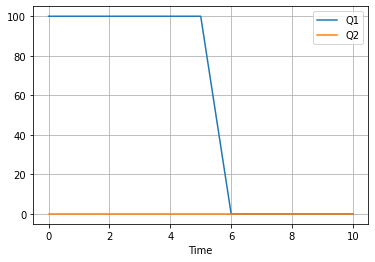

In [13]:
%matplotlib inline

import pandas as pd
data = pd.read_csv('data.csv')
data.index = data['Time']
print(data)
data[['Q1', 'Q2']].plot(grid=True)

## The TCLab `Plotter`

The `Plotter` class adds a real time plotting of experimental data. A plotter is created from an instance of an historian as follows

    h = Historian(lab.sources)
    p = Plotter(h)
    
Updating the plotter also updates the associated historian.

    p.update(t)
    
The following example shows how this works.

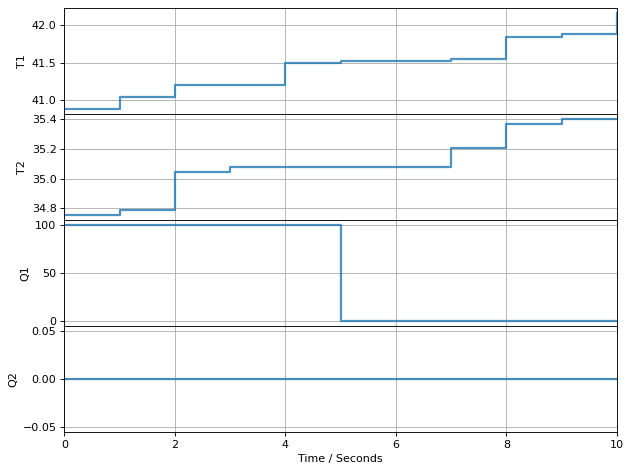

TCLab disconnected successfully.


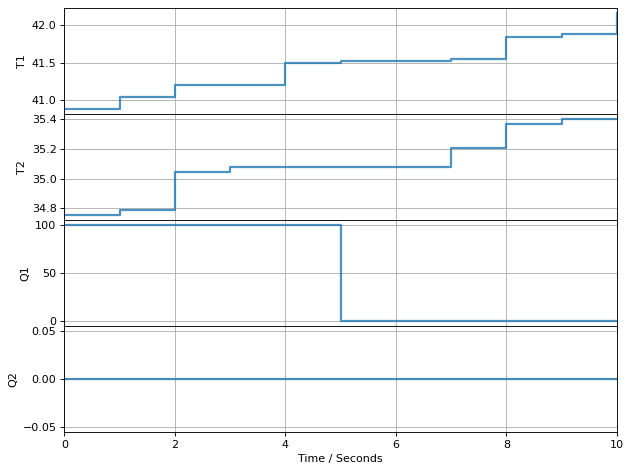

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

from tclab import TCLab, clock, Historian, Plotter

with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, 10)
    for t in clock(10):
        lab.Q1(100 if t <= 5 else 0)
        p.update(t)
        
h.to_csv('data.csv')

## Using TCLab Offline

The `tclab` library includes a simulation capability. This is useful for circumstances when it isn't possible to access the hardware.  The followinig cell demonstrated the use of `setup` to use the library in simulation mode. The argument `connected` is set to `True` if the hardware is connected, otherwise `False`. Simulation mode allows the use of the `speedup` parameter to run experiments at some multiple of real time. 

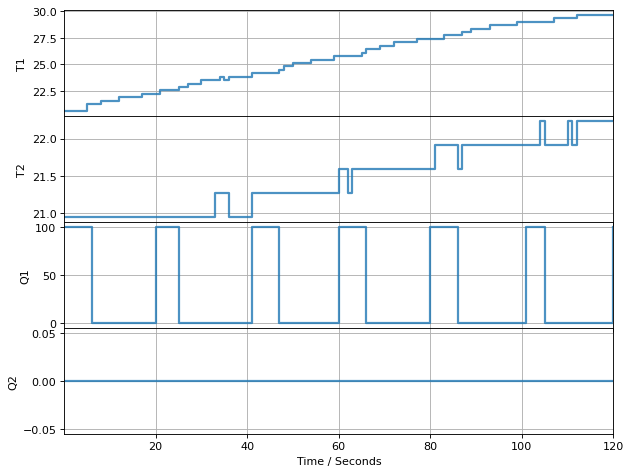

TCLab Model disconnected successfully.


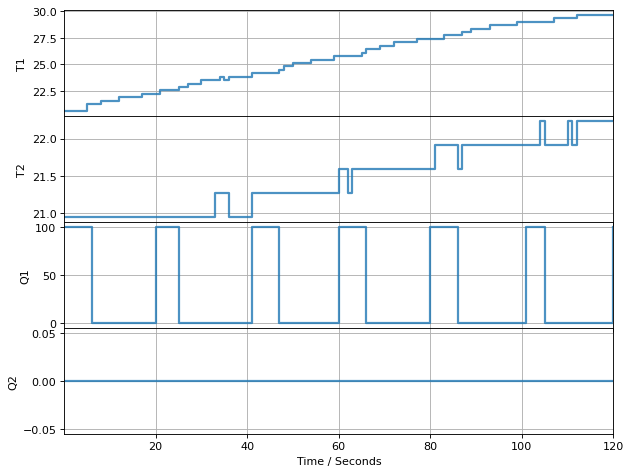

In [15]:
%matplotlib inline
from tclab import clock, setup, Historian, Plotter

t_period = 120
TCLab = setup(connected=False, speedup=20)
        
with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, t_period)
    for t in clock(t_period):
        lab.Q1(100 if t % 20 <= 5 else 0)
        p.update(t)

## Running Diagnostics

In [16]:
import tclab

print("Version = ", tclab.__version__)
tclab.diagnose()

Version =  0.4.9

Checking connection
-------------------
Looking for Arduino on any port...
Arduino Leonardo found on port /dev/cu.usbmodem14401

Testing TCLab object in debug mode
----------------------------------
TCLab version 0.4.9
Sent: "Q1 0"
Return: "0.000"
Sent: "VER"
Return: "TCLab Firmware 2.0.1 Arduino Leonardo/Micro"
Arduino Leonardo connected on port /dev/cu.usbmodem14401 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
Sent: "Q2 0"
Return: "0.000"
Reading temperature
Sent: "T1"
Return: "42.200"
42.2
Sent: "Q1 0"
Return: "0.000"
Sent: "Q2 0"
Return: "0.000"
Sent: "X"
Return: "Stop"
TCLab disconnected successfully.

Testing TCLab functions
-----------------------
TCLab version 0.4.9
Arduino Leonardo connected on port /dev/cu.usbmodem14401 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
Testing LED. Should turn on for 10 seconds.
Countdown: 0  

Reading temperatures
T1 = 41.201 °C, T2 = 35.723 °C

Writing fractional value to heaters...
We wrote Q1 =